In [43]:
import cv2
import time
import numpy as np
from google.colab.patches import cv2_imshow

#Task 1, var 5

In [34]:
img = cv2.imread('/content/variant-5.jpg')

In [35]:
mean = 0
stddev = 180
noise = np.zeros(img.shape, np.uint8)
cv2.randn(noise, mean, stddev)

# Add noise to image
noisy_img = cv2.add(img, noise)

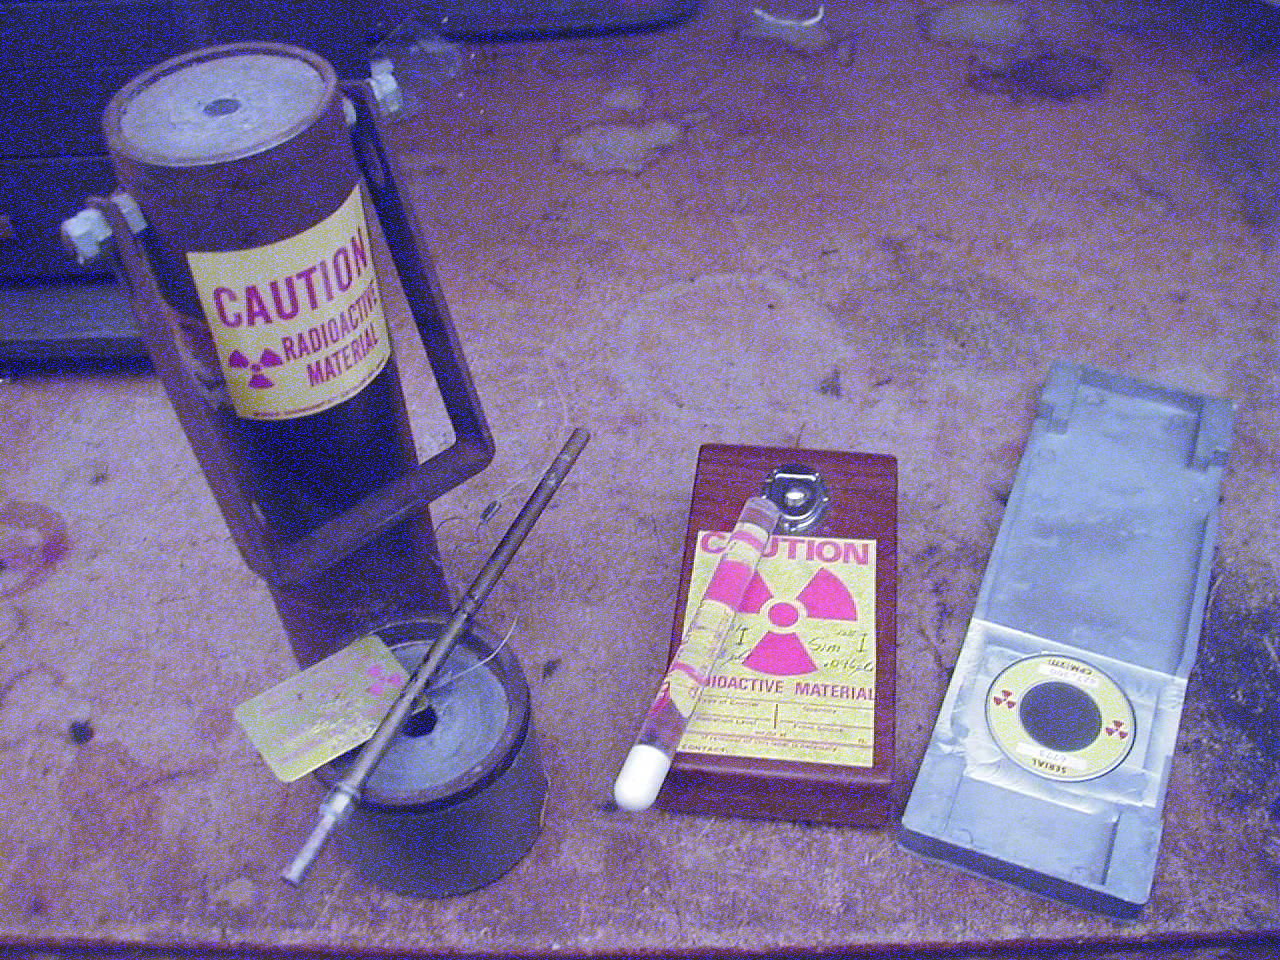

True

In [39]:
cv2_imshow(noisy_img)
cv2.waitKey(0)
cv2.imwrite('noisy_img.jpg', noisy_img)

Task 2


In [42]:
def video_processing():
    cap = cv2.VideoCapture(1)
    down_points = (640, 480)
    i = 0
    while True:
        ret, frame = cap.read()
        if not ret:
            break

        frame_gray = cv2.cv2tColor(frame, cv2.COLOR_BGR2GRAY)
        template = cv2.imread('mario_coin.png', cv2.IMREAD_GRAYSCALE)
        assert template is not None, "file could not be read, check with os.path.exists()"
        w, h = template.shape[::-1]
        res = cv2.matchTemplate(frame_gray,template,cv2.TM_CCOEFF_NORMED)
        threshold = 0.8
        loc = np.where( res >= threshold)
        for pt in zip(*loc[::-1]):
            if (pt[0]**2 + pt[1]**2)**0.5 < 50:
                cv2.rectangle(frame, pt, (pt[0] + w, pt[1] + h), (255,0,0), 2)
            elif ((pt[0] + w)**2 + (pt[1] + h)**2)**0.5 > (640**2+480*2)**0.5 - 50:
                cv2.rectangle(frame, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)
            else:
                cv2.rectangle(frame, pt, (pt[0] + w, pt[1] + h), (0,255,0), 2)
        cv2.imwrite('res.png',frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

        time.sleep(0.1)
        i += 1

    cap.release()


if __name__ == '__main__':
    #image_processing()
    video_processing()

cv2.waitKey(0)
cv2.destroyAllWindows()